In [37]:
# Required Libraries
import pandas as pd
import matplotlib.pyplot as plt

## Load the Dataset

In [38]:
# Load in the dataset
df = pd.read_csv('/content/diabetes.csv')
# Verify correct dataset loaded
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### Boxplot Creation Function

In [39]:
def create_boxplot(col, pop_stats, sam_stats):
  fig, ax = plt.subplots(figsize=(6,4))
  ax.bxp([pop_stats, sam_stats], showfliers=False)

  ax.set_ylabel(col)
  ax.set_title('Sample vs. Population')
  plt.tight_layout()
  plt.show()

### Summary Plot Function

In [40]:
def plot_summaries(stats, title, y_label):
    plt.bar(stats.keys(), stats.values())
    plt.ylabel(y_label)
    plt.title(title)
    plt.tight_layout()
    plt.show()

# 1a)

## Get the Mean and Max Glucose for Sample and Population

Average Glucose Level for the Sample: 121.64
Max Glucose Level for the Sample: 175

Average Glucose Level for the Population: 120.89
Max Glucose Level for the Population: 199



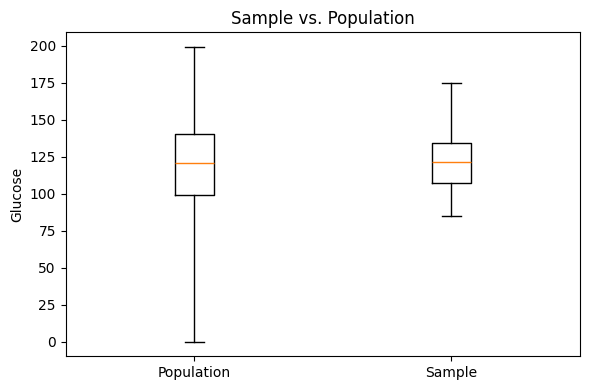

In [41]:
# Taking a random sample (without resampling) of size 25
sample = df.sample(25, random_state=75)

# Getting the glucose stats for the sample
sample_gl_min = round(sample.Glucose.min(), 2)
sample_gl_q1 = round(sample.Glucose.quantile(0.25), 2)
sample_gl_mean = round(sample.Glucose.mean(), 2)
sample_gl_q3 = round(sample.Glucose.quantile(0.75), 2)
sample_gl_max = round(sample.Glucose.max(), 2)

# Getting the glucose stats for the population
pop_gl_min = round(df.Glucose.min(), 2)
pop_gl_q1 = round(df.Glucose.quantile(0.25), 2)
pop_gl_mean = round(df.Glucose.mean(), 2)
pop_gl_q3 = round(df.Glucose.quantile(0.75), 2)
pop_gl_max = round(df.Glucose.max(), 2)

# Printing the stats to the user
print(f'Average Glucose Level for the Sample: {sample_gl_mean}')
print(f'Max Glucose Level for the Sample: {sample_gl_max}')
print()
print(f'Average Glucose Level for the Population: {pop_gl_mean}')
print(f'Max Glucose Level for the Population: {pop_gl_max}')
print()

# Creating a dict to feed into the boxplot
sam_stats = {
    'label': 'Sample',
    'whislo': sample_gl_min,
    'q1'    : sample_gl_q1,
    'med'   : sample_gl_mean,
    'q3'    : sample_gl_q3,
    'whishi': sample_gl_max
}

pop_stats = {
    'label': 'Population',
    'whislo': pop_gl_min,
    'q1'    : pop_gl_q1,
    'med'   : pop_gl_mean,
    'q3'    : pop_gl_q3,
    'whishi': pop_gl_max
}

# Creating the actual boxplot
create_boxplot('Glucose', pop_stats, sam_stats)

#1b)

## 98th Percentile of Sample and Population

98% Quartile for the Sample: 45.55
98% Quartile for the Population: 47.53



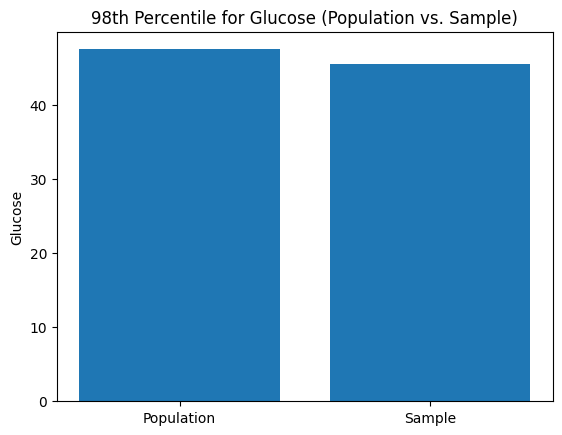

In [42]:
# Taking the 98th quartile for sample and population
sample_98_quartile = round(float(sample['BMI'].quantile(0.98)), 2)
pop_98_quartile = round(float(df['BMI'].quantile(0.98)), 2)

# Printing results to user
print(f'98% Quartile for the Sample: {sample_98_quartile}')
print(f'98% Quartile for the Population: {pop_98_quartile}')
print()

# Creating a simple bar chart for comparing 98th quartile for sample and pop
plt.bar(
    ['Population', 'Sample'],
    [pop_98_quartile, sample_98_quartile]
)
plt.ylabel('Glucose')
plt.title('98th Percentile for Glucose (Population vs. Sample)')
plt.show()

#1c)

combined_bp_std: 19.27
combined_bp_min: 0.0
combined_bp_q25: 64.0
combined_bp_mean: 69.21
combined_bp_q75: 80.0
combined_bp_max: 122.0

pop_bp_std: 19.36
pop_bp_min: 0.0
pop_bp_q25: 62.0
pop_bp_mean: 69.11
pop_bp_q75: 80.0
pop_bp_max: 122.0



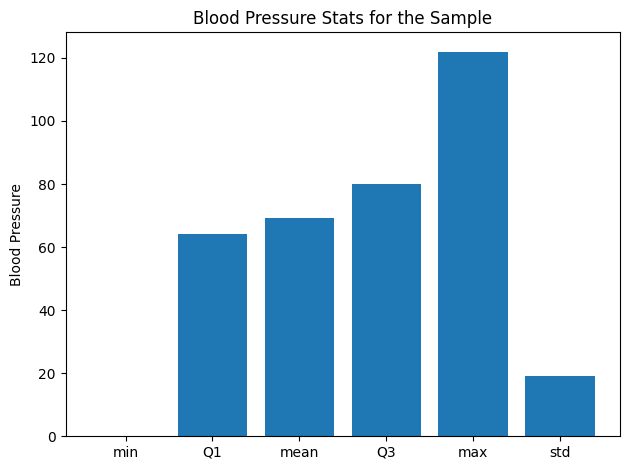

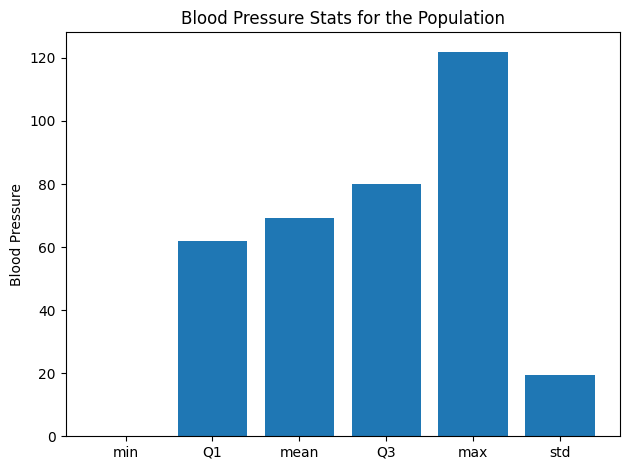

In [43]:
# Take all 500 samples and take the average stats from all 500 then compare to population mean

# Init the combined df
combined_samples = None

# Take 500 samples of 150 from the df, then add them to a combined df
for i in range(500):
  bootstrap_sample = df.sample(n=150, replace=True, random_state=i*2) # Random state set for reproducability
  combined_samples = pd.concat([combined_samples, bootstrap_sample])

# Get the stats for the bootstrapped df
combined_bp_mean = round(float(combined_samples.BloodPressure.mean()), 2)
combined_bp_std  = round(float(combined_samples.BloodPressure.std()), 2)
combined_bp_min  = round(float(combined_samples.BloodPressure.min()), 2)
combined_bp_q25  = round(float(combined_samples.BloodPressure.quantile(0.25)), 2)
combined_bp_q50  = round(float(combined_samples.BloodPressure.quantile(0.50)), 2)
combined_bp_q75  = round(float(combined_samples.BloodPressure.quantile(0.75)), 2)
combined_bp_max  = round(float(combined_samples.BloodPressure.max()), 2)

# Get the stats for the population
pop_bp_mean = round(float(df.BloodPressure.mean()), 2)
pop_bp_std = round(float(df.BloodPressure.std()), 2)
pop_bp_min = round(float(df.BloodPressure.min()), 2)
pop_bp_q25 = round(float(df.BloodPressure.quantile(0.25)), 2)
pop_bp_q50 = round(float(df.BloodPressure.quantile(0.50)), 2)
pop_bp_q75 = round(float(df.BloodPressure.quantile(0.75)), 2)
pop_bp_max = round(float(df.BloodPressure.max()), 2)

# Print the results to the user
print(f'combined_bp_std: {combined_bp_std}')
print(f'combined_bp_min: {combined_bp_min}')
print(f'combined_bp_q25: {combined_bp_q25}')
print(f'combined_bp_mean: {combined_bp_mean}')
print(f'combined_bp_q75: {combined_bp_q75}')
print(f'combined_bp_max: {combined_bp_max}')
print()
print(f'pop_bp_std: {pop_bp_std}')
print(f'pop_bp_min: {pop_bp_min}')
print(f'pop_bp_q25: {pop_bp_q25}')
print(f'pop_bp_mean: {pop_bp_mean}')
print(f'pop_bp_q75: {pop_bp_q75}')
print(f'pop_bp_max: {pop_bp_max}')
print()

# Creating the stats dicts for the function
sample_stats = {
  'min'  : combined_bp_min,
  'Q1'   : combined_bp_q25,
  'mean' : combined_bp_mean,
  'Q3'   : combined_bp_q75,
  'max'  : combined_bp_max,
  'std'  : combined_bp_std
}

pop_stats = {
  'min'  : pop_bp_min,
  'Q1'   : pop_bp_q25,
  'mean' : pop_bp_mean,
  'Q3'   : pop_bp_q75,
  'max'  : pop_bp_max,
  'std'  : pop_bp_std
}

# Plotting the stats
plot_summaries(sample_stats, 'Blood Pressure Stats for the Sample', 'Blood Pressure')
print()
plot_summaries(pop_stats, 'Blood Pressure Stats for the Population', 'Blood Pressure')

#### This chart shows us that the bootstrapped samples and population have very similar statistics. We can see that the min, max and Q75 are the same for both, whereas the rest of the statistics for the sample data is within 5% of the population statistics.